Mutual information

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-whitegrid")
import sys
sys.path.append(
    'C:\\Users\\peter\\Documents\\MyProjects\\PyProj\\Trav\\spel\\')

# sys.path.append('C:\\Users\\peter\\Documents\\MyProjects\\PyProj\\Trav\\spel\\modeller\\')
# import V75_scraping as vs
import typ as tp
import travdata as td

pref='../'  #''


In [4]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [5]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


In [6]:
v75 = td.v75(pref=pref)

target_encode_list = [
    'bana',
    'häst',
    'kusk',
    'kön',
    'h1_kusk',
    'h1_bana',
    'h2_kusk',
    'h2_bana',
    'h3_kusk',
    'h3_bana',
    'h4_kusk',
    'h4_bana',
    'h5_kusk',
    'h5_bana']


../all_data.csv
Loading dataframe from the file: ../all_data.csv


In [7]:
# df, ENC = v75.förbered_data()

# df=v75.test_lägg_till_kolumner()
# display(df.info())


In [8]:
# from category_encoders import TargetEncoder
# work_df = df.copy()
# y = work_df.pop('y')
# encoder = TargetEncoder(cols=target_encode_list, min_samples_leaf=20, smoothing=10).fit(work_df, y)
# display(work_df)
# work_df= encoder.transform(work_df)
# work_df['y'] = y

# display('finally',work_df)

In [9]:


df, ENC = v75.förbered_data(extra=True, target_encode_list=target_encode_list)
display(df.info())
dforg=v75.get_df()

df.datum=pd.to_datetime(df['datum'])
# set datum as index
df.set_index('datum', inplace=True)
df.sort_index(inplace=True)
X = df.copy()
X.drop(['avd'], axis=1, inplace=True)
y = X.pop("y")

X

plac finns i df
Creating new encoder
Target encoding done


,datum,avd,bana,häst,kusk,streck,spår,dist,lopp_dist,start,...,rel_kr,streck_avst,rel_rank,h1_samma_bana,h2_samma_bana,h3_samma_bana,h1_samma_kusk,h2_samma_kusk,h3_samma_kusk,y
0,2014-12-28,1.0,0.086178,0.102838,0.063000,5.0,6.0,2100.0,2100.0,0,...,0.102926,43.0,0.416667,False,False,False,True,True,True,0
1,2014-12-28,1.0,0.086178,0.093088,0.098840,7.0,12.0,2100.0,2100.0,0,...,0.114914,41.0,0.250000,False,False,False,False,False,True,0
2,2014-12-28,1.0,0.086178,0.125285,0.126230,23.0,2.0,2100.0,2100.0,0,...,0.101349,25.0,0.166667,False,False,False,False,False,False,1
3,2014-12-28,1.0,0.086178,0.082332,0.123148,48.0,1.0,2100.0,2100.0,0,...,0.134556,0.0,0.083333,False,False,False,False,False,False,0
4,2014-12-28,1.0,0.086178,0.086177,0.048035,5.0,5.0,2100.0,2100.0,0,...,0.149796,43.0,0.416667,False,False,False,False,False,False,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 46950 entries, 0 to 47145
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datum          46950 non-null  object 
 1   avd            46950 non-null  float64
 2   bana           46950 non-null  float64
 3   häst           46950 non-null  float64
 4   kusk           46950 non-null  float64
 5   streck         46950 non-null  float64
 6   spår           46950 non-null  float64
 7   dist           46950 non-null  float64
 8   lopp_dist      46950 non-null  float64
 9   start          46950 non-null  int64  
 10  ålder          46950 non-null  int64  
 11  kön            46950 non-null  float64
 12  pris           46950 non-null  float64
 13  h1_kusk        46950 non-null  float64
 14  h1_bana        46950 non-null  float64
 15  h1_spår        46950 non-null  float64
 16  h1_plac        46950 non-null  float64
 17  h1_pris        46950 non-null  float64
 18  h1_odd

None

,bana,häst,kusk,streck,spår,dist,lopp_dist,start,ålder,kön,...,delta4,rel_kr,streck_avst,rel_rank,h1_samma_bana,h2_samma_bana,h3_samma_bana,h1_samma_kusk,h2_samma_kusk,h3_samma_kusk
datum,,,,,,,,,,,,,,,,,,,,,
2014-12-28,0.086178,0.102838,0.063000,5.0,6.0,2100.0,2100.0,0,6,0.080678,...,18.0,0.102926,43.0,0.416667,False,False,False,True,True,True
2014-12-28,0.086178,0.093088,0.098840,7.0,12.0,2100.0,2100.0,0,7,0.080678,...,11.0,0.114914,41.0,0.250000,False,False,False,False,False,True
2014-12-28,0.086178,0.125285,0.126230,23.0,2.0,2100.0,2100.0,0,7,0.080678,...,15.0,0.101349,25.0,0.166667,False,False,False,False,False,False
2014-12-28,0.086178,0.082332,0.123148,48.0,1.0,2100.0,2100.0,0,4,0.080678,...,8.0,0.134556,0.0,0.083333,False,False,False,False,False,False
2014-12-28,0.086178,0.086177,0.048035,5.0,5.0,2100.0,2100.0,0,7,0.080678,...,14.0,0.149796,43.0,0.416667,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,0.086294,0.070456,0.045241,0.0,8.0,2140.0,2140.0,0,6,0.080678,...,10.0,0.071893,36.0,0.750000,False,False,False,True,True,True
2022-10-01,0.086294,0.069130,0.052509,1.0,9.0,2140.0,2140.0,0,7,0.071900,...,31.0,0.038970,35.0,0.666667,True,False,False,False,False,False
2022-10-01,0.086294,0.085295,0.049588,0.0,10.0,2140.0,2140.0,0,8,0.080678,...,0.0,0.040882,36.0,0.750000,False,True,False,False,True,False


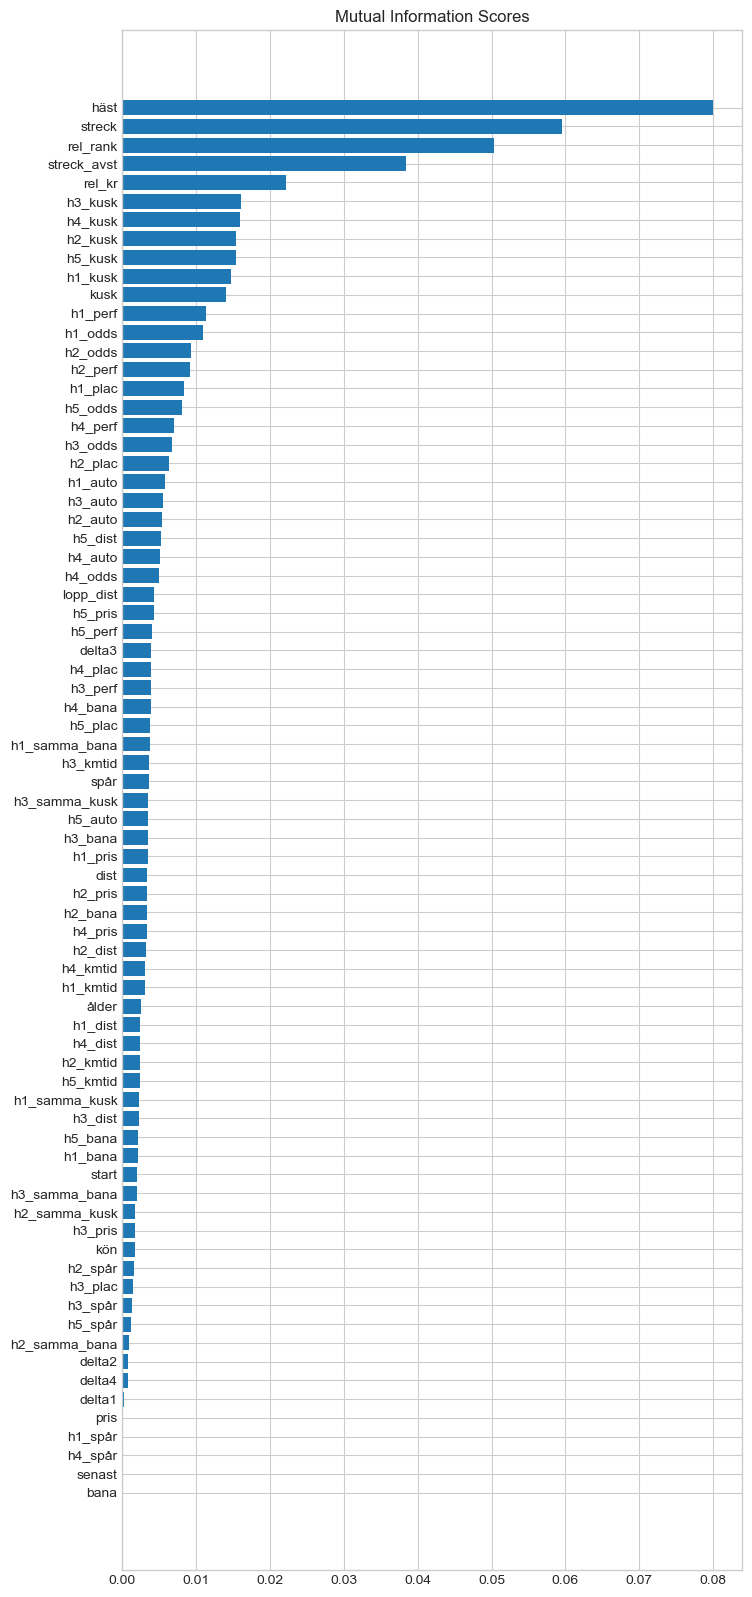

In [9]:

discrete_features = X.dtypes == int
mi_scores = make_mi_scores(X, y, discrete_features)

plt.figure(dpi=100, figsize=(8, 20))
plot_mi_scores(mi_scores)

In [10]:
mi_scores[mi_scores>0.01]

häst           0.079938
streck         0.059542
rel_rank       0.050389
streck_avst    0.038420
rel_kr         0.022155
h3_kusk        0.016022
h4_kusk        0.016001
h2_kusk        0.015460
h5_kusk        0.015347
h1_kusk        0.014755
kusk           0.013986
h1_perf        0.011322
h1_odds        0.010944
Name: MI Scores, dtype: float64

<AxesSubplot:ylabel='Frequency'>

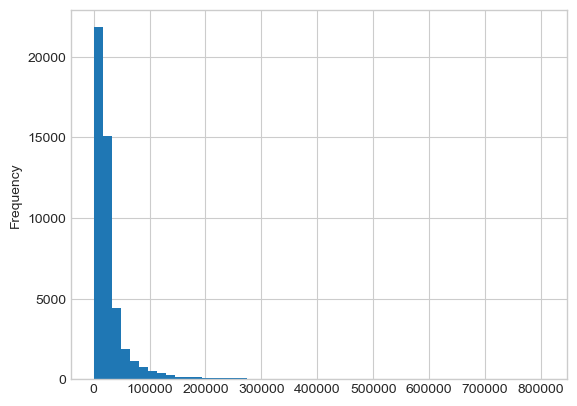

In [29]:
dforg.kr.plot(kind='hist',bins=50)